In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/home/borislav/Загрузки/experiment_lesson_4.csv')

# Задание
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это 
приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

## Сформируем гипотезы   
**Нулевая гипотеза (H0):** Разницы между средним временем доставки в тестовой и контрольной группе нет  
**Альтернативная гипотеза (H1):** Разница между средним временем доставки в тестовой и контрольной группе есть

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [35]:
test = df.query('experiment_group == "test"')

In [36]:
control = df.query('experiment_group  == "control"')

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

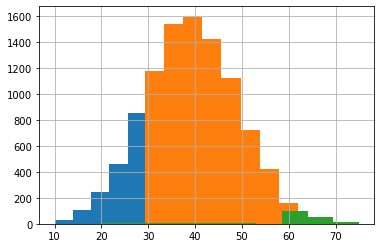

In [7]:
test.groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

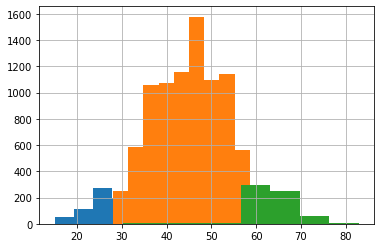

In [8]:
control.groupby('district').delivery_time.hist()

Выглядят нормально

Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?


In [9]:
abs(len(test) - len(control))

12

In [12]:
test.head()

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test


Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

In [20]:
x = df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [21]:
y = df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [23]:
stats.shapiro(x)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [31]:
stats.shapiro(y)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [33]:
x_std = np.std(test.delivery_time)

In [32]:
y_std = np.std(control.delivery_time)

Для того, чтобы проверить нормальность распределения, я использую Shapiro-Wilk Test.  
Этот тест показывает, что значения в тестовой группе распределены **нормально**.  
В контрольной группе  так же распределение является **нормальным**.  
Стандартное отклонение времени доставки в тесте равно 9.88  
Стандартное отклонение времени доставки в контроле равно 9.99  

Проводим тест


In [43]:
stats.ttest_ind(test.delivery_time, control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [59]:
x1 =  control.delivery_time.mean()

In [60]:
y1 = test.delivery_time.mean()

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [69]:
100 - (y1 * 100 / x1)

13.354653121660817

In [64]:
round(percentage,2)

13.35

Раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.